# Iris Dataset

## Visualization and Preprocessing

(150, 5)


<Figure size 432x288 with 0 Axes>

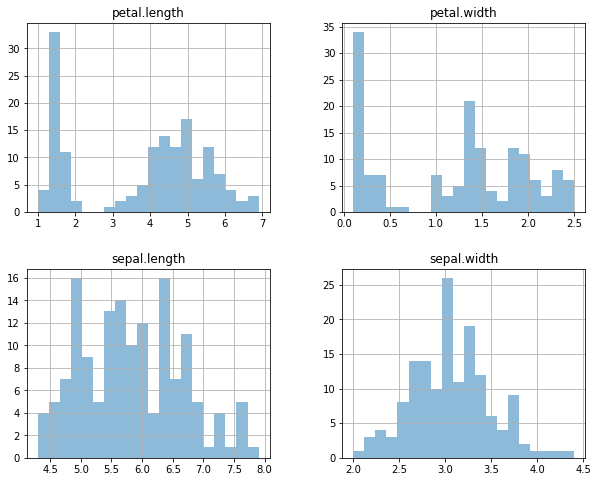

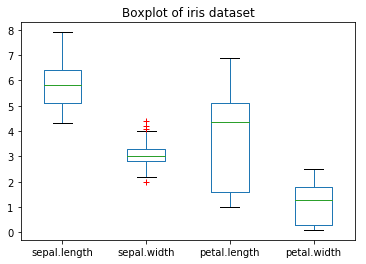

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import itertools

## load iris dataset from csv
irisDataset = pd.read_csv('./iris.csv', names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'], skiprows=1)

## check with the data reading
print(irisDataset.shape) #irisDataset['sepal.length'][:]

plt.figure();
## plot the histogram
irisDataset.hist(alpha=0.5, bins=20, figsize=(10, 8)) #, title='Histogram of iris dataset'

## plot the Box
irisDataset.plot.box(sym='r+', title='Boxplot of iris dataset')

## Decision Tree model wit K-fold Validation

accuracy : 0.953333
Setosa precision : 1.000000
Setosa recall : 1.000000
Versicolor precision : 0.921569
Versicolor recall : 0.940000
Virginica precision : 0.938776
Virginica recall : 0.920000


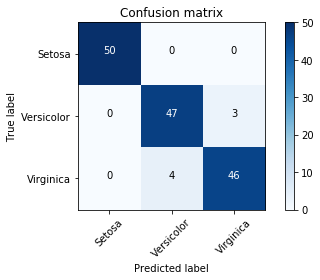

In [182]:
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import random
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


## load iris dataset
iris.data = np.delete(np.array(irisDataset),4,axis=1)
iris.target = np.array(irisDataset)[:,4]
#print(iris.target)
#print(iris.data)
treeNum = 10

## Do the attribute bagging or not
attrBagging = 1
K_fold_n_splits = 10
##K-fold forest
kf = KFold(n_splits=K_fold_n_splits,shuffle=True)
irisVariety = ["Setosa", "Versicolor", "Virginica"]
confusionMatrix = 0

for train_index, test_index in kf.split(iris.data):
    #split the data set into training set and validation set
    
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    tree_attr_index = [] #used for record the delete attribute index in attribute bagging mode
    CLF = []
    predictedOutcome = []
    votedOutcome = []
    
    
    for i in range(treeNum):
        randomTreeData = random.shuffle(train_index) #shuffle the index for building the random forest
        treeIndex = train_index[0:int(train_index.shape[0]*0.7)]
        randomTree_x = iris.data[treeIndex]
        randomTree_y = iris.target[treeIndex]
        
        if(attrBagging ==1):
            # create the shuffle index for each attribute
            index_shuf = np.arange(randomTree_x.shape[1])
            random.shuffle(index_shuf)
            
            # delete the specific columns for training data(attribute bagging)
            temp = np.delete(randomTree_x,index_shuf[0:int(index_shuf.shape[0]*0.5)],axis=1)
            
            #record the index of attribute for each tree
            tree_attr_index.append(index_shuf[0:int(index_shuf.shape[0]*0.5)])
            
            # train the data
            clf = tree.DecisionTreeClassifier()
            CLF.append(clf.fit(temp, randomTree_y))
        else:
            clf = tree.DecisionTreeClassifier()
            CLF.append(clf.fit(randomTree_x, randomTree_y))
            
    ##predict
    totolScore = 0.
    for i in range(treeNum):
        if(attrBagging ==1):
            # need to predict the data in same atrribute for specific tree
            validate_x = np.delete(X_test,tree_attr_index[i],axis=1)
            predictedOutcome.append(CLF[i].predict(validate_x))
        else:
            predictedOutcome.append(CLF[i].predict(X_test))
            
    for i in range(len(X_test)):
        vote = [0] * len(irisVariety)
        mostVotingCount = 0
        mostVotingIndex = 0
        for j in range(treeNum):
            for k in range(len(irisVariety)):
                if(predictedOutcome[j][i] == irisVariety[k]):
                    vote[k] += 1
        #print(vote)

        for j in range(len(irisVariety)):
            if(vote[j] > mostVotingCount):
                mostVotingCount = vote[j]
                mostVotingIndex = j

        votedOutcome.append(irisVariety[mostVotingIndex])
        #print(votedOutcome)

    actualOutcome = y_test
    confusionMatrix += confusion_matrix(actualOutcome, votedOutcome, labels = irisVariety)

accuracy = 0
for i in range(len(irisVariety)):
    accuracy += confusionMatrix[i][i]
accuracy = accuracy / len(iris.data)
print('accuracy : {:f}'.format(accuracy))
    
for i in range(len(irisVariety)):
    precision = 0
    recall = 0
    for j in range(len(irisVariety)):
        if(j == i):
            precision += confusionMatrix[j][j]
            recall += confusionMatrix[j][j]
        else:
            precision += confusionMatrix[j][i]
            recall += confusionMatrix[i][j]
    precision = confusionMatrix[i][i] / precision
    recall = confusionMatrix[i][i] / recall
    print('{:s} precision : {:f}'.format(irisVariety[i], precision))
    print('{:s} recall : {:f}'.format(irisVariety[i], recall))

plt.imshow(confusionMatrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(irisVariety))
plt.xticks(tick_marks, irisVariety, rotation=45)
plt.yticks(tick_marks, irisVariety)

fmt = 'd'
thresh = confusionMatrix.max() / 2.
for i, j in itertools.product(range(confusionMatrix.shape[0]), range(confusionMatrix.shape[1])):
    plt.text(j, i, format(confusionMatrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusionMatrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
    

## Decision Tree model with Resubstitution Validation

accuracy : 1.000000
Setosa precision : 1.000000
Setosa recall : 1.000000
Versicolor precision : 1.000000
Versicolor recall : 1.000000
Virginica precision : 1.000000
Virginica recall : 1.000000


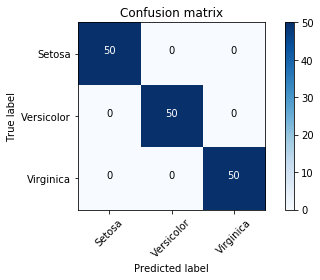

In [180]:
#define the portion of dataset here
xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size = 0)
totolScore = 0.
tree_attr_index =[]
CLF_ = []
confusionMatrix = 0
predictedOutcome = []
votedOutcome = []

#Do the attribute baggong or not
attrBagging = 1
for i in range(treeNum):
    # create the suffle index for each data
    index_shuf = np.arange(xTrain.shape[0])
    random.shuffle(index_shuf)
    
    #define the portion of training dataset for single tree here
    treeIndex = index_shuf[0:int(xTrain.shape[0]*1)]
    randomTree_x = iris.data[treeIndex]
    randomTree_y = iris.target[treeIndex]
    
    if(attrBagging ==1):
        # create the suffle index for each attribute (same as K-fold)
        index_shuf = np.arange(randomTree_x.shape[1])
        random.shuffle(index_shuf)
        temp = np.delete(randomTree_x,index_shuf[0:int(index_shuf.shape[0]*0.5)],axis=1)
        tree_attr_index.append(index_shuf[0:int(index_shuf.shape[0]*0.5)])
        clf = tree.DecisionTreeClassifier()
        CLF_.append(clf.fit(temp, randomTree_y))
        
    else:
        clf = tree.DecisionTreeClassifier()
        CLF_.append(clf.fit(randomTree_x, randomTree_y))

for i in range(treeNum):
    if(attrBagging ==1):
        validate_x = np.delete(randomTree_x,tree_attr_index[i],axis=1)        
        predictedOutcome.append(CLF_[i].predict(validate_x))
    else:
        predictedOutcome.append(CLF_[i].predict(randomTree_x))
        
for i in range(len(iris.data)):
    vote = [0] * len(irisVariety)
    mostVotingCount = 0
    mostVotingIndex = 0
    for j in range(treeNum):
        for k in range(len(irisVariety)):
            if(predictedOutcome[j][i] == irisVariety[k]):
                vote[k] += 1
    #print(vote)
                
    for j in range(len(irisVariety)):
        if(vote[j] > mostVotingCount):
            mostVotingCount = vote[j]
            mostVotingIndex = j
    
    votedOutcome.append(irisVariety[mostVotingIndex])
#print(votedOutcome)
    
actualOutcome = randomTree_y
confusionMatrix = confusion_matrix(actualOutcome, votedOutcome, labels = irisVariety)

#print(confusionMatrix)

accuracy = 0
for i in range(len(irisVariety)):
    accuracy += confusionMatrix[i][i]
accuracy = accuracy / len(iris.data)
print('accuracy : {:f}'.format(accuracy))

for i in range(len(irisVariety)):
    precision = 0
    recall = 0
    for j in range(len(irisVariety)):
        if(j == i):
            precision += confusionMatrix[j][j]
            recall += confusionMatrix[j][j]
        else:
            precision += confusionMatrix[j][i]
            recall += confusionMatrix[i][j]
    precision = confusionMatrix[i][i] / precision
    recall = confusionMatrix[i][i] / recall
    print('{:s} precision : {:f}'.format(irisVariety[i], precision))
    print('{:s} recall : {:f}'.format(irisVariety[i], recall))


plt.imshow(confusionMatrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(irisVariety))
plt.xticks(tick_marks, irisVariety, rotation=45)
plt.yticks(tick_marks, irisVariety)

fmt = 'd'
thresh = confusionMatrix.max() / 2.
for i, j in itertools.product(range(confusionMatrix.shape[0]), range(confusionMatrix.shape[1])):
    plt.text(j, i, format(confusionMatrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusionMatrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()